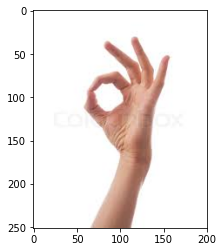

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

%matplotlib inline 

image=cv2.imread('Desktop/Udacity/hand.jpg')
image_copy = np.copy(image)
#change colors from BGR to RGB 
image_rgb = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
image_copy = np.copy(image_rgb)

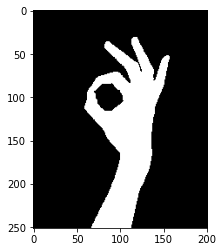

In [13]:
# PRODUCE A BINARY IMAGE FOR FINDING THE CONTOURS 
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

#create a binary threshold image 
retval, binary = cv2.threshold(gray, 210, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap='gray')

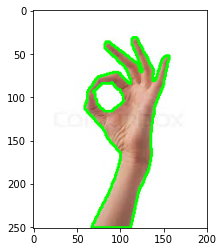

In [16]:
#find and draw contours 
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#draw all the countours on a copy of the original image 
image_copy2=np.copy(image_copy)
all_contours = cv2.drawContours(image_copy2, contours, -1, (0,255,0),2)
plt.imshow(all_contours)

In [17]:
#finding the orientation of this contour 
def orientations(contours):
    """
    Orientation 
    :param contours: a list of contours
    :return: angles, the orientations of the contours
    """
    angles = []
    for c in contours : 
        (x,y), (MA,ma), angle = cv2.fitEllipse(c)
        angles.append(angle)   
    return angles


# ---------------------------------------------------------- #
# Print out the orientation values
angles = orientations(contours)
print('Angles of each contour (in degrees): ' + str(angles))


Angles of each contour (in degrees): [8.84937572479248, 130.98092651367188]


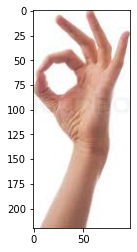

In [23]:
## TODO: Complete this function so that
## it returns a new, cropped version of the original image
def left_hand_crop(image, selected_contour):
    """
    Left hand crop 
    :param image: the original image
    :param selectec_contour: the contour that will be used for cropping
    :return: cropped_image, the cropped image around the left hand
    """
    
    
    x,y,w,h = cv2.boundingRect(selected_contour)
    box_image = cv2.rectangle(all_contours, (x,y), (x+w,y+h), (200,0,200),2)

    
    # Make a copy of the image to crop
    cropped_image = np.copy(image)
    cropped_image = cropped_image[y: y + h, x: x + w] 
    return cropped_image


## Replace this value
selected_contour = contours[0]


# ---------------------------------------------------------- #
# If you've selected a contour
if(selected_contour is not None):
    # Call the crop function with that contour passed in as a parameter
    cropped_image = left_hand_crop(image_copy, selected_contour)
    plt.imshow(cropped_image)